# Name -  SAGARIKA PAUL

# Importing necessary packages

In [1]:
import fantasy_agn

In [2]:
#Before starting, we call some of the standard python packages, such as matplotlib, pandas, numpy, etc. 
import matplotlib.pyplot as plt
#import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import numpy as np
import pandas as pd

import glob



# Below command import the above mentioned reading commands
from fantasy_agn.tools import read_sdss, read_text, read_gama_fits

# Below command import the necessary commands, which will be described later
from fantasy_agn.models import create_input_folder

from fantasy_agn.models import create_feii_model, create_model, create_tied_model, continuum, create_line, create_fixed_model

# Reading the data
# I read the data using fantasy_agn as well as astropy because I wanted to see the data structure properly

In [3]:
s=read_sdss('/home/sagarika/belgrade/agn/spec-0762-52232-0498.fits')  #Since we are using data from the SDSS archive

In [4]:
help(s)

Help on read_sdss in module fantasy_agn.tools object:

class read_sdss(spectrum)
 |  read_sdss(filename)
 |  
 |  Method resolution order:
 |      read_sdss
 |      spectrum
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from spectrum:
 |  
 |  CorRed(self, redshift=0)
 |      The CorRed function corrects the flux for redshift.
 |      It takes in a redshift and corrects the wavelength, flux, and error arrays by that given redshift.
 |      
 |      :param self: Used to Reference the class object.
 |      :param redshift=0: Used to Specify the redshift of the object.
 |      :return: The wavelength, flux and error arrays for the object at a redshift of z=0.
 |  
 |  DeRedden(self, ebv=0)
 |      Function for dereddening  a flux vector  using the parametrization given by
 |  

In [5]:
#ASTROPY PACKAGE TO VIWE DATA

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

s1 = get_pkg_data_filename('/home/sagarika/belgrade/agn/spec-0762-52232-0498.fits')

In [6]:
file=fits.open(s1)
file.info()

Filename: /home/sagarika/belgrade/agn/spec-0762-52232-0498.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3844R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [7]:
file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4512881312.04 / 1st row - Number of seconds since Nov 17 1858  
RA      =            128.83073 / 1st row - Right ascension of telescope boresigh
DEC     =            44.043959 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '09:51:32.96'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                52232 / MJD of observation                             
MJDLIST = '52232   '        

In [8]:
#file[0].data

In [9]:
#file[1].header

In [10]:
#file[1].data

In [11]:
#file[0].data

In [12]:
#file[2].header

In [13]:
#file[2].data

In [14]:
#OPENING IN TOPCAT I CHECKED THAT REDSHIFT OF THE QSO IS 0.035884

# Galactic extinction correction

In [15]:
s.DeRedden()

# Redshift correction

In [16]:
s.CorRed()

# Prints the wavelength in angstrom, flux in ergs s**-1 cm**2 and redshift

In [17]:
print(s.flux)   #10e-17 ergs/cm2/s
print(s.wave)   #Angstrom
print(s.z)      #resdhift

[573.8562   577.7314   581.60486  ... 117.70598  117.078445 115.1754  ]
[3029.2896 3029.9866 3030.6853 ... 7335.7544 7337.4424 7339.135 ]
0.25439972


# Plotting the data

Text(0, 0.5, 'Flux ($10^{-17} ergs$ $cm^{-2} s^{-1}$)')

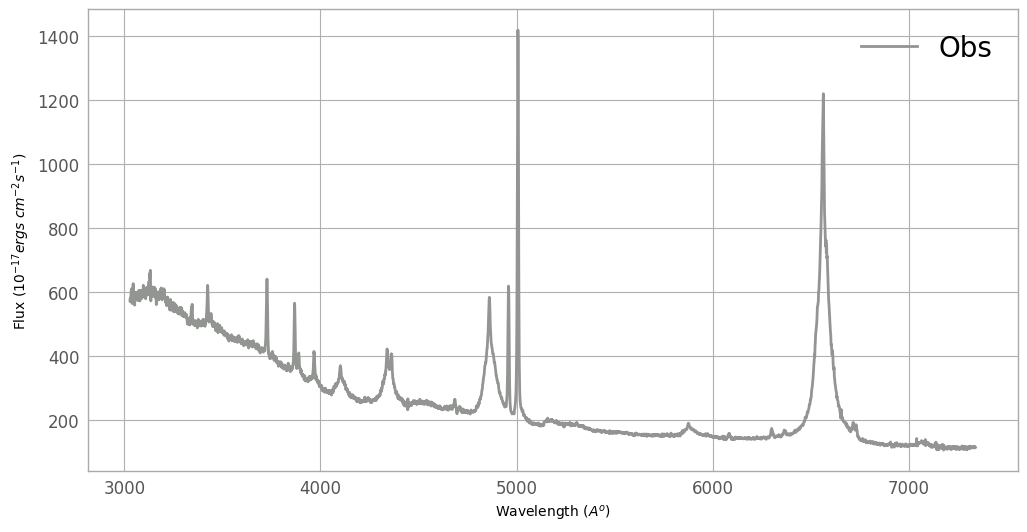

In [18]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(12,6))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.legend(loc='upper right',  prop={'size': 20}, frameon=False, ncol=2)
plt.xlabel('Wavelength $(A^o)$',fontsize=10)
plt.ylabel('Flux ($10^{-17} ergs$ $cm^{-2} s^{-1}$)',fontsize=10)

# Absence og absorption line and presence of strong blue continuum indicates that the stellar contribution
# from the host galaxy can be negligible.

In [19]:
# Command fit_host_sdss() fits the observed spectrum using the Principle Component Analysis (PCA) 
# with the optimal combination of 5 eignevectors for the galaxy (stellar) and 10 QSO components, 
# vastly used for SDSS spectra and described in details in Yip et al. (2004) and Vanden Berk et al. (2006).

# Command fit_host() fits the observed spectrum with PCA which uses all available eigenvectors
# (10 eignevectors for the galaxy (stellar) and 15 QSO components). In this case the code will test for 
# different number of components until reaching best result based on the chi2 parameter. 

s.fit_host_sdss()

Host contribution is negliglable


In [20]:
#command to restore the spectrum before host galaxy fitting and substraction
s.restore() 

In [21]:
#Since host galaxy contribution is negligible,
#One possibility is to mask the narrow emission lines while performing the host galaxy fitting. 
#This is done with setting the option mask_host=True, which by default masks 
#all well known nebular lines ([O III], [N II], [S II]), but customized list of emission lines can be also given.

s.fit_host_sdss(mask_host=True, custom=False)

Host contribution is negliglable


In [22]:
# If there are stars or star forming regions, there will be absorption lines. 
# Since there is no visible absorption line in the spectrum, that the stellar contribution
# from the host galaxy can be negligible.

In [23]:
#Creation of the predefined lists of emission lines 
create_input_folder(xmin=3500,xmax=8000, path_to_folder='lines/')

Directory  lines/  already exists


In [24]:
s.crop(4000, 8000)  # This crops the wavelength axis
print(s.wave)       

[4000.7642 4001.6843 4002.6072 ... 7335.7544 7337.4424 7339.135 ]


# Defining Models

In [25]:
#MODEL

cont=continuum(s,min_refer=5690, refer=5700, max_refer=5710)
broad=create_fixed_model(['hydrogen.csv'], name='br_h') #BLR
broad2=create_fixed_model(['hydrogen.csv'], name='br_h2',fwhm=5000, min_fwhm=4000, max_fwhm=11000) #VeryBLR
he=create_fixed_model(['helium.csv'], name='he',fwhm=3000, min_fwhm=1000, max_fwhm=6000)
narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','hydrogen.csv'],prefix='nr_',fwhm=1000,min_offset=0, max_offset=300, min_fwhm=700, max_fwhm=1200,fix_oiii_ratio=True, position=5006.803341, included=True,min_amplitude=0.2)
fe=create_feii_model(name='feii', fwhm=1800, min_fwhm=1000, max_fwhm=2000, offset=0, min_offset=-3000, max_offset=3000)


# Fitting models

In [26]:
model = cont+narrow+broad+fe+broad2+he

In [27]:
# Command s.fit() perform fittings of the spectrum, which is based on Python Sherpa package, with above defined model.
# We can set the number of consequent fittings (option ntrial) to increase the convergence, given with the chi2, 
# which is listed.

s.fit(model, ntrial=6)     #trials


stati 362265.64524754044
1 iter stat:  573.5643184949386
2 iter stat:  151.76800826542603
3 iter stat:  62.92007139577527
4 iter stat:  32.52753736934574
5 iter stat:  21.205035847538056
6 iter stat:  14.06331748814955


# Plotting the fitted spectra

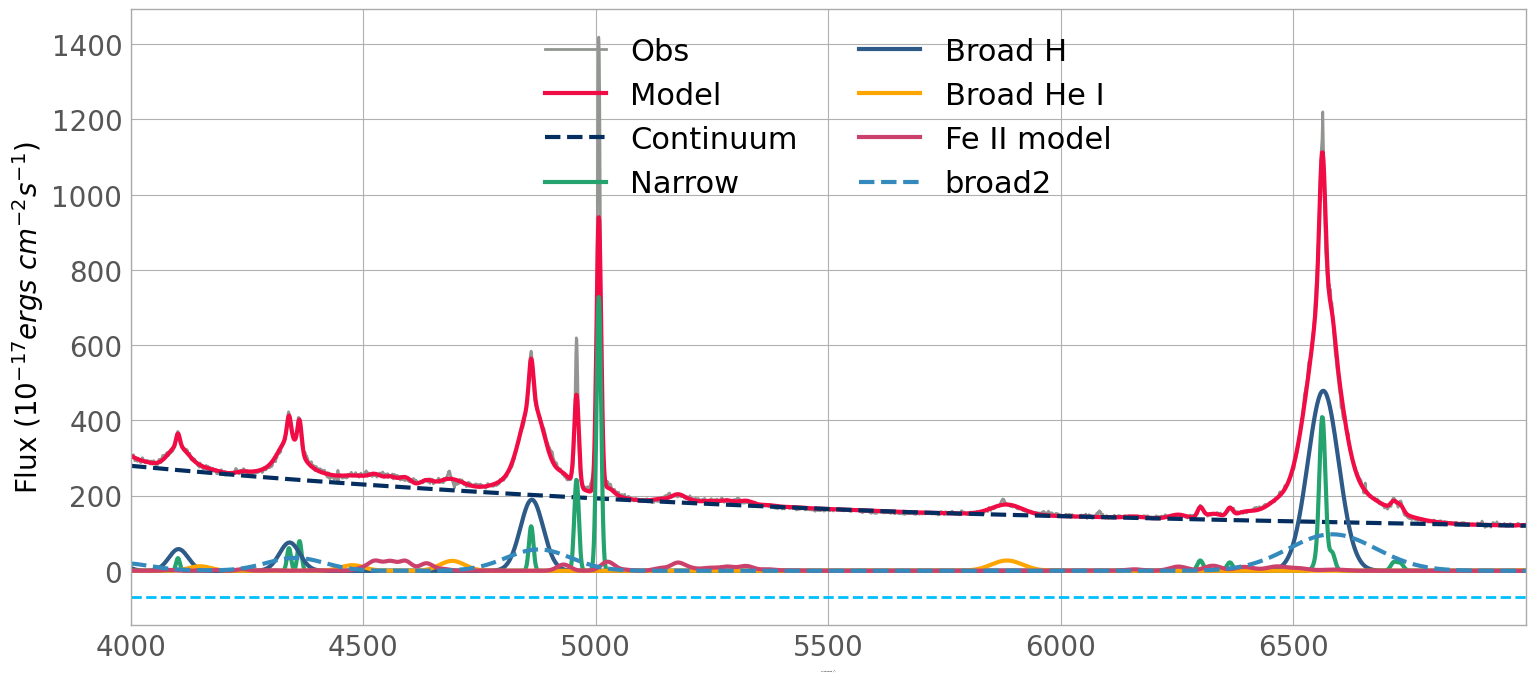

In [28]:

plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,8))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.plot(s.wave, model(s.wave), color="#F10C45",label='Model',lw=3)
#plt.plot(s.wave, model(s.wave)-s.flux-70, '-',color="#929591", label='Residual', lw=2)
plt.axhline(y=-70, color='deepskyblue', linestyle='--', lw=2)

plt.plot(s.wave, cont(s.wave),'--',color="#042E60",label='Continuum', lw=3)
plt.plot(s.wave, narrow(s.wave),label='Narrow',color="#25A36F",lw=3)
plt.plot(s.wave, broad(s.wave), label='Broad H', lw=3, color="#2E5A88")
plt.plot(s.wave, he(s.wave), label='Broad He I', lw=3, color="orange")
plt.plot(s.wave, fe(s.wave),'-',color="#CB416B",label='Fe II model', lw=3)
plt.plot(s.wave, broad2(s.wave),'--',label='broad2', lw=3)

plt.xlabel('Rest Wavelength $(A^o)$',fontsize=0)
plt.ylabel('Flux ($10^{-17} ergs$ $cm^{-2} s^{-1}$)',fontsize=20)
plt.xlim(4000,7000)
#plt.ylim(-150,900)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(4000, 7000, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

#plt.savefig('fantasy_fit.pdf')

# Plotting residuals

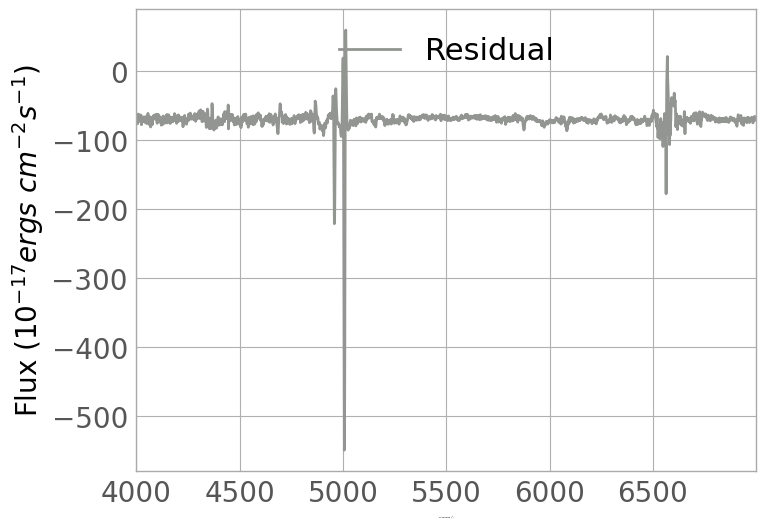

In [29]:
plt.plot(s.wave, model(s.wave)-s.flux-70, '-',color="#929591", label='Residual', lw=2)
plt.xlabel('Rest Wavelength $(A^o)$',fontsize=0)
plt.ylabel('Flux ($10^{-17} ergs$ $cm^{-2} s^{-1}$)',fontsize=20)
plt.xlim(4000,7000)
#plt.ylim(-150,900)
plt.tick_params(which='both', direction="in")
plt.yticks(fontsize=20)
plt.xticks(np.arange(4000, 7000, step=500),fontsize=20)
plt.legend(loc='upper center',  prop={'size': 22}, frameon=False, ncol=2)

# Model parameters

In [30]:
model

<BinaryOpModel model instance '(((((brokenpowerlaw + (((((((((((((((((nr__OIII5007 + nr__OIII4958) + nr__NII6584) + nr__NIII6548) + nr__[OII]_3726) + nr__[OII]_3728) + nr__[NeIII]_3868) + nr__[OIII]_4363) + nr__[OI]_6300) + nr__[OI]_6363) + nr__[SII]_6716) + nr__[SII]_6730) + nr__[OII]_7330) + nr__Heps_3970) + nr__Hd_4101) + nr__Hg_4340) + nr__Hb_4861) + nr__Ha_6562)) + br_h) + feii) + br_h2) + he)'>

In [31]:
print(s.gres.format())
s.save_json() #saving parameters 

Method                = levmar
Statistic             = chi2
Initial fit statistic = 7848.56
Final fit statistic   = 7834.49 at function evaluation 1361
Data points           = 2636
Degrees of freedom    = 2572
Probability [Q-value] = 0
Reduced statistic     = 3.04607
Change in statistic   = 14.0633
   brokenpowerlaw.refer   5690.04      +/- 34.2245     
   brokenpowerlaw.ampl   155.167      +/- 1.36111     
   brokenpowerlaw.index1   -1.66563     +/- 0.019367    
   brokenpowerlaw.index2   0.414955     +/- 0.0245987   
   nr__OIII5007.ampl   728.131      +/- 5.92676     
   nr__OIII5007.offs_kms   0.010116     +/- 1.48592     
   nr__OIII5007.fwhm   700.007      +/- 3.49716     
   nr__NII6584.ampl   48.0573      +/- 6.73757     
   nr__[OII]_3726.ampl   2.40862      +/- 0           
   nr__[OII]_3728.ampl   2.40862      +/- 0           
   nr__[NeIII]_3868.ampl   2.40862      +/- 0           
   nr__[OIII]_4363.ampl   79.0659      +/- 3.54957     
   nr__[OI]_6300.ampl   27.3509      

# Analysis of model fitting

In [32]:
import json
f=open('spec-0762-52232-0498_pars.json')

In [33]:
data = json.load(f)

In [34]:
data

{'brokenpowerlaw.refer': 5690.03884314375,
 'brokenpowerlaw.ampl': 155.1669555252845,
 'brokenpowerlaw.index1': -1.6656280456302075,
 'brokenpowerlaw.index2': 0.41495505086030593,
 'nr__OIII5007.ampl': 728.1307523469832,
 'nr__OIII5007.offs_kms': 0.01011597771362031,
 'nr__OIII5007.fwhm': 700.0069089517542,
 'nr__NII6584.ampl': 48.057293979140866,
 'nr__[OII]_3726.ampl': 2.408615115556847,
 'nr__[OII]_3728.ampl': 2.408615115556847,
 'nr__[NeIII]_3868.ampl': 2.408615115556847,
 'nr__[OIII]_4363.ampl': 79.06592570595794,
 'nr__[OI]_6300.ampl': 27.350883093799908,
 'nr__[OI]_6363.ampl': 22.303118089309642,
 'nr__[SII]_6716.ampl': 21.96474543776702,
 'nr__[SII]_6730.ampl': 19.07216139108065,
 'nr__[OII]_7330.ampl': 2.84007686969995,
 'nr__Heps_3970.ampl': 0.4086151155568385,
 'nr__Hd_4101.ampl': 33.68040431734855,
 'nr__Hg_4340.ampl': 60.2634220363785,
 'nr__Hb_4861.ampl': 118.34767965679862,
 'nr__Ha_6562.ampl': 408.979568475312,
 'br_h.amp_Heps_3970': 21.730086893074827,
 'br_h.amp_Hd_41

# Measure the line fluxes

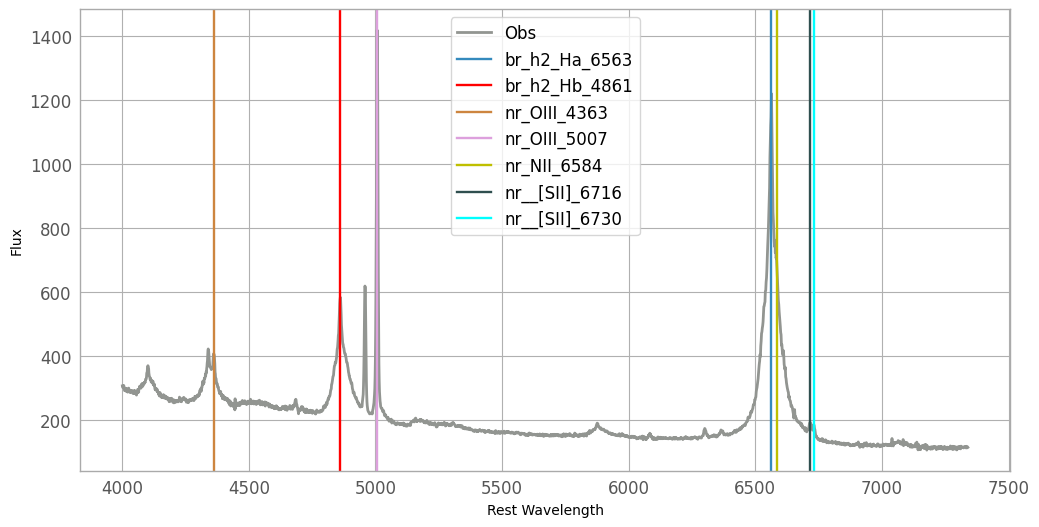

In [35]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(12,6))
plt.plot(s.wave, s.flux, color="#929591", label='Obs', lw=2)
plt.legend(loc='upper right',  prop={'size': 20}, frameon=False, ncol=2)

# The commented line were used to check and plot the minimum and maximum wavelength used as mask for measuring the 
# line fluxes.

#Broad Hα
plt.axvline(x = 6563 , label = 'br_h2_Ha_6563')
#plt.axvline(x = 6400, label = 'br_h2_Ha_6563_min')
#plt.axvline(x = 6700, label = 'br_h2_Ha_6563_max')


#Broad Hβ
plt.axvline(x = 4861, color = 'r', label = 'br_h2_Hb_4861')
#plt.axvline(x = 4800, color = 'r', label = 'br_h2_Hb_4861_min')
#plt.axvline(x = 4945, color = 'r', label = 'br_h2_Hb_4861_max')

#Narrow O[III] 4363
#This is a forbidden line
plt.axvline(x = 4363,color = 'peru', label = 'nr_OIII_4363')
#plt.axvline(x = 4350,color = 'peru', label = 'nr_OIII_4363_min')
#plt.axvline(x = 4425,color = 'peru', label = 'nr_OIII_4363_max')

#Narrow OIII 5007
plt.axvline(x = 5007,color = 'plum', label = 'nr_OIII_5007')
#plt.axvline(x = 4990,color = 'plum', label = 'nr_OIII_5007_min')
#plt.axvline(x = 5050,color = 'plum', label = 'nr_OIII_5007_max')

#Narrow NII 6584
plt.axvline(x = 6584,color = 'y', label = 'nr_NII_6584')
#plt.axvline(x = 6582,color = 'y', label = 'nr_NII_6584_min')
#plt.axvline(x = 6586,color = 'y', label = 'nr_NII_6584_max')

#Narrow [SII] 6716
#This is a forbidden line
plt.axvline(x = 6716,color = 'darkslategrey', label = 'nr__[SII]_6716')
#plt.axvline(x = 6710,color = 'darkslategrey', label = 'nr__[SII]_6716_min')
#plt.axvline(x = 6720,color = 'darkslategrey', label = 'nr__[SII]_6716_max')

#Narrow [SII] 6730
#This is a forbidden line
plt.axvline(x = 6730,color = 'cyan', label = 'nr__[SII]_6730')
#plt.axvline(x = 6725,color = 'cyan', label = 'nr__[SII]_6730_min')
#plt.axvline(x = 6740,color = 'cyan', label = 'nr__[SII]_6730_max')

plt.xlabel('Rest Wavelength',fontsize=10)
plt.ylabel('Flux',fontsize=10)

plt.legend()

# Line flux of Broad Hα

In [36]:
x=s.wave
mask_ha=(x>6400)&(x<6700)

flux_Ha_broad=np.sum(broad(s.wave)[mask_ha])

print('Broad Ha=',flux_Ha_broad)

Broad Ha= 26286.604


# Line flux of Broad Hβ

In [37]:
#x=s.wave
mask_hb=(x>4800)&(x<4945)

flux_Hb_broad=np.sum(broad(s.wave)[mask_hb])

print('Broad Hb=',flux_Hb_broad)

Broad Hb= 10328.871


# Line flux of Narrow Hα

In [38]:
#x=s.wave
mask_ha=(x>6400)&(x<6700)

flux_Ha_narrow=np.sum(narrow(s.wave)[mask_ha])

print('narrow Ha=',flux_Ha_narrow)

narrow Ha= 5109.9634


# Line flux of Narrow Hβ

In [39]:
mask_hb=(x>4800)&(x<4945)

flux_Hb_narrow=np.sum(narrow(s.wave)[mask_hb])

print('narrow Hb=',flux_Hb_narrow)

narrow Hb= 1285.3612


# Line flux of Narrow [OIII] at 4363

In [40]:
mask_oiii=(x>4350)&(x<4425)

flux_oiii_narrow=np.sum(narrow(s.wave)[mask_oiii])

print('narrow oiii=',flux_oiii_narrow)

narrow oiii= 861.1705


# Line flux of Narrow OIII at 5007

In [41]:
mask_oiii_1=(x>4990)&(x<5050)

flux_oiii_narrow_1=np.sum(narrow(s.wave)[mask_oiii_1])

print('narrow oiii_1=',flux_oiii_narrow_1)

narrow oiii_1= 7859.868


# Line flux of Narrow [SII] at 6716

In [42]:
mask_sii_1=(x>6710)&(x<6720)

flux_sii_narrow_1=np.sum(narrow(s.wave)[mask_sii_1])

print('narrow sii_1=',flux_sii_narrow_1)

narrow sii_1= 148.0098


# Line flux of Narrow [SII] at 6730

In [43]:
mask_sii_2=(x>6725)&(x<6740)

flux_sii_narrow_2=np.sum(narrow(s.wave)[mask_sii_2])

print('narrow sii_2=',flux_sii_narrow_2)

narrow sii_2= 174.46533


# Line flux of Narrow NII 6584

In [44]:
mask_nii=(x>6582)&(x<6586)

flux_nii_narrow=np.sum(narrow(s.wave)[mask_nii])

print('narrow nii=',flux_nii_narrow)

narrow nii= 99.27949


# Line Ratio

In [45]:
r_nii_ha = flux_nii_narrow/flux_Ha_narrow
print("[NII]6583/Ha = ",r_nii_ha )
print('log10 [NII]6583/Ha = ',np.log10(r_nii_ha))

[NII]6583/Ha =  0.01942861
log10 [NII]6583/Ha =  -1.7115582


In [46]:
r_oiii_hb = flux_oiii_narrow_1/flux_Hb_narrow
print('[OIII]5007/Hb = ',r_oiii_hb)
print('log10 [OIII]5007/Hb = ',np.log10(r_oiii_hb))

[OIII]5007/Hb =  6.11491
log10 [OIII]5007/Hb =  0.78639007


Baldwin, Phillips & Terlevich (BPT) diagrams are commonly used to study AGNs and differentiate them based on ionization mechanism. 
It differentiates normal H II regions and normal AGNs (Seyferts and QSOs) based on their [O III] 5007 / H$\beta$, [N II] 6583 / H$\alpha$, and [S II] 6716, 6731 / H$\alpha$ flux ratios.
These lines are chosen because they are the strongest lines that are usually observed in AGNs.

The vertical axis is the [O III] 5007 / H$\beta$ flux ratio and the horizontal axis is the [N II] 6583 / H$\alpha$ flux ratio. Both ratios are based on lines close in wavelength and are therefore nearly reddening independent.
O III] 5007 / H$\beta$ is a amesaure of ionization state of the gas and [N II] 6583 / H$\alpha$ is a measure of metallicity of the gas.
This diagram can also be plotted on a log-log diagram as shown in the second image.


Narrow-line AGNs (Seyfert 2s and NLRGs) which are ionized by ``harder'' continua (i.e., with a greater fraction of high-energy photons, such as a power-law spectrum) are ususlly found in the lower left of the diagram. 
LINERS ( low ionization nuclear emission line regions) are found in the upper right region.
LINERs can be distinguished from H II regions by higher values of [N II] 6583 / H$\alpha$, and from Seyfert galaxies by lower values of [O III] 5007 / H$\beta$.
The solid line is an empirical division between these two classes of object.

Open circles are for H II regions sources that are clearly ionized by hot stars. 
The closed circles are narrow-line AGNs (Seyfert 2s and NLRGs) which are ionized by ``harder'' continua.
The solid line divides these two categories.

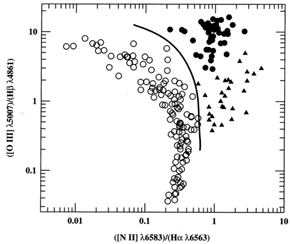

Image taken from from B.M. Peterson An Introduction to Active Galactic Nuclei, Cambridge University Press, (1997)

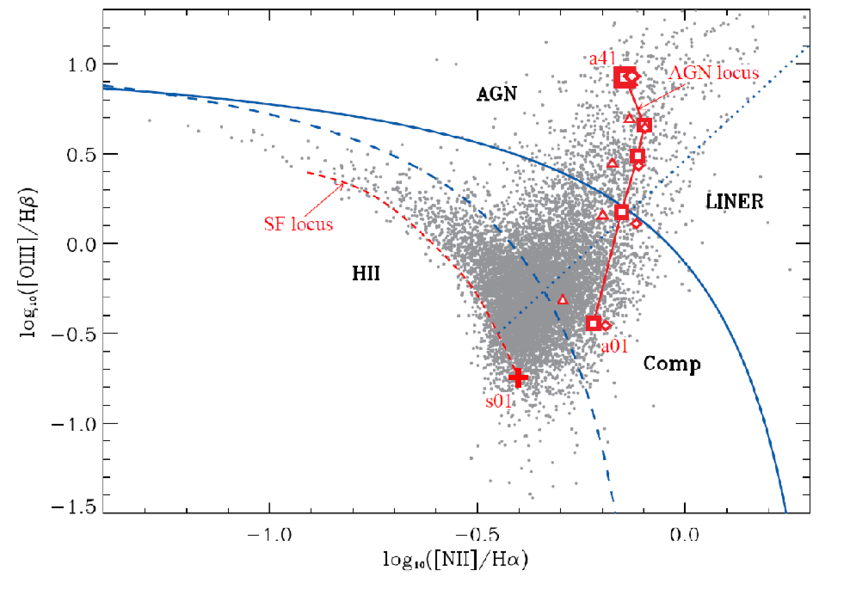

Image taken from Richardson, Chris & Allen, James & Baldwin, Jack & Hewett, Paul & Ferland, G.. (2013). Interpreting the Ionization Sequence in AGN Emission-Line Spectra. Monthly Notices of the Royal Astronomical Society. 437. 10.1093/mnras/stt2056. 

# Based on the values I obtained, this specific AGN lies almost on the sold line dividing AGNs from star forming region 
# with log10 [NII]6583/Ha = -1.7115582 and log10 [OIII]5007/Hb = 0.78639007

# Ha/Hb line ratio for broad and narrow lines

In [47]:
b_ha_hb = flux_Ha_broad/flux_Hb_broad

n_ha_hb = flux_Ha_narrow/flux_Hb_narrow

print("Narrow Hα/Hβ = ", n_ha_hb)

print("Broad Hα/Hβ = ", b_ha_hb)

Narrow Hα/Hβ =  3.9755077
Broad Hα/Hβ =  2.5449638


# Since the host galaxy contibution was negligible, these values have only been calculated for the restored spectrum and no comparison can be made for this values to the values that would have been obtained if these were also calculated after host galaxy contribution correction.   